In [ ]:
# 보스턴집값 예측
# https://wikidocs.net/book/3682

In [ ]:
# https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression

In [ ]:
# conda install -c conda-forge scikit-learn 
# conda install pycaret

보스턴 주택 가격
: 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리함
town 별

In [4]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn import metrics


In [5]:
df = pd.read_excel('./boston.xlsx')

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.shape # 데이터의 크기를 확인, 506개의 데이터 존재, 14개의 칼럼

(506, 14)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
pd.set_option('display.max_rows', 1000)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
nc = df.isnull().sum().to_frame('my_count')
print('check null count: ', nc[nc.my_count > 0] )

check null count:  Empty DataFrame
Columns: [my_count]
Index: []


범주형
결측치

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
# from pycaret.classification import *
from pycaret.regression import *
# from pycaret.regression import setup, compare_models

In [35]:
# reg1 = setup(data = insurance, target = 'charges', train_size = 0.5)

reg = setup(data = df, 
             target = 'target',
             numeric_imputation = 'mean',
             categorical_features = ['CHAS']  , 
             #ignore_features = ['Alley'],
             train_size = 0.7,
             normalize = True,
             silent = True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,361
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(506, 14)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0
INFO:logs:setup() succesfully completed......................................


In [46]:
type(reg)

tuple

In [48]:
# reg

In [34]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,2.2708,10.4336,3.0790,0.8851,0.1425,0.1153,0.1361
1,CatBoost Regressor,2.2175,10.6806,3.1863,0.8767,0.1459,0.1114,1.1012
2,Gradient Boosting Regressor,2.4056,12.7648,3.4211,0.8521,0.1608,0.1257,0.0575
3,Extreme Gradient Boosting,2.5831,14.0764,3.6034,0.8379,0.1676,0.1312,0.0517
4,Light Gradient Boosting Machine,2.6078,13.2488,3.5533,0.8350,0.1603,0.1316,0.0185
5,Random Forest,2.5496,15.1925,3.6607,0.8278,0.1652,0.1277,0.1374
6,AdaBoost Regressor,2.8465,16.0926,3.8199,0.8203,0.1766,0.1499,0.0636
7,K Neighbors Regressor,2.9203,20.3247,4.3507,0.7598,0.1816,0.1371,0.0031
8,Decision Tree,3.1681,23.0867,4.6214,0.7244,0.2159,0.1649,0.0039
9,Bayesian Ridge,3.5200,23.7277,4.7935,0.7074,0.2381,0.1756,0.0039


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6556, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6556, verbose=0, warm_start=False)

In [36]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6904,10.4942,3.2395,0.8926,0.1829,0.1454
1,1.9740,7.4461,2.7287,0.9284,0.1128,0.0886
2,1.8341,5.7845,2.4051,0.9358,0.1084,0.0921
3,2.2872,10.9366,3.3071,0.9161,0.1384,0.1156
4,1.7707,5.9443,2.4381,0.9301,0.0955,0.0792
5,2.5080,19.5767,4.4246,0.6280,0.1574,0.1158
6,2.4931,10.6165,3.2583,0.8281,0.1634,0.1358
7,1.8989,5.5289,2.3514,0.9202,0.1152,0.0971
8,1.6499,5.7369,2.3952,0.9380,0.1136,0.0836
9,2.6221,10.6965,3.2705,0.8426,0.1888,0.1545


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 1
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=361, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [37]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6915,21.8021,4.6693,0.7770,0.1774,0.1235
1,1.7627,7.5188,2.7420,0.9277,0.1106,0.0777
2,2.2185,7.8521,2.8022,0.9128,0.1223,0.1062
3,2.6765,18.7532,4.3305,0.8561,0.1584,0.1231
4,2.2046,18.6309,4.3164,0.7809,0.1286,0.0834
5,2.2128,10.3526,3.2175,0.8033,0.1421,0.0988
6,2.2066,9.0864,3.0144,0.8529,0.1681,0.1324
7,1.9278,6.4830,2.5462,0.9064,0.1127,0.0953
8,2.3416,13.0343,3.6103,0.8590,0.1329,0.1026
9,2.7585,14.1375,3.7600,0.7920,0.2218,0.1764


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.04, loss='huber',
                          max_depth=90, max_features='log2',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=4,
                          min_samples_split=5, min_weight_fraction_leaf=0.0,
                          n_estimators=165, n_iter_no_change=None,
                          presort='deprecated', random_state=361, subsample=0.5,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
# conda install -c conda-forge shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.04, loss='huber',
                          max_depth=90, max_features='log2',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=4,
                          min_samples_split=5, min_weight_fraction_leaf=0.0,
                          n_estimators=165, n_iter_no_change=None,
                          presort='deprecated', random_state=361, subsample=0.5,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False), plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


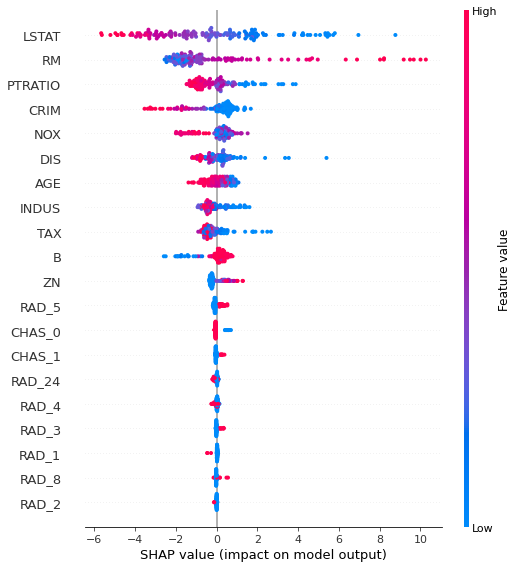

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [38]:
interpret_model(tuned_gbr)

In [39]:
evaluate_model(gbr)

,Parameters
alpha,0.9
ccp_alpha,0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,ls
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [40]:
lr_pred_holdout = predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.029,8.1042,2.8468,0.8987,0.1421,0.1114


In [41]:
lr_pred_holdout

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,target,Label
0,4.903104,-0.487722,1.015999,1.194724,-2.515426,1.117494,-1.015789,1.530926,0.806576,-2.942878,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.8801
1,-0.418126,3.160441,-1.516987,-1.249924,0.140137,-1.169050,2.563455,-0.565640,-0.534275,0.441052,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.7,22.9588
2,1.171247,-0.487722,1.015999,1.600725,-0.498110,0.687212,-0.938589,1.530926,0.806576,-3.154709,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.4,9.2941
3,-0.358360,0.370669,-1.045700,0.797361,1.759974,0.740552,-0.786851,-0.856665,-2.522434,0.347526,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43.1,43.4695
4,-0.397642,0.456508,-0.769931,-1.068519,-0.083534,0.377835,2.025290,-0.464673,0.297977,0.213432,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.5,21.0553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.277091,-0.487722,-0.437258,-0.144217,-0.203205,0.822342,0.086449,-0.601276,1.176466,0.441052,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.2,15.6505
148,-0.387983,-0.487722,-0.211099,0.261784,-0.510932,-0.923682,-0.671859,-0.102376,0.344213,0.441052,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.5,20.2059
149,-0.151241,-0.487722,1.231945,0.434551,-0.576466,1.021481,-0.668532,-0.031105,-1.736418,-0.093680,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19.1,20.4928
150,-0.410849,-0.487722,-1.266023,-0.576134,-0.969672,0.754777,-0.383691,-1.278354,-0.303094,0.376362,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.4,22.8440


In [42]:
lr_pred_holdout.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'CHAS_0', 'CHAS_1', 'RAD_1', 'RAD_2', 'RAD_24', 'RAD_3',
       'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8', 'target', 'Label'],
      dtype='object')

In [43]:
lr_pred_holdout.shape

(152, 24)